# Dataset

In [1]:
import tensorflow as tf

# List GPUs detected
gpus = tf.config.list_physical_devices('GPU')
print("Available GPUs:", gpus)

# Check memory details
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4906589245831718371
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14619377664
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12367070258866438635
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Minimal and elegant theme
sns.set_theme(style="white", palette="colorblind", font_scale=1.2)

# Matplotlib tweaks for clean visuals
plt.rcParams.update({
    # "figure.figsize": (10, 6),
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "axes.spines.top": True,
    "axes.spines.right": True,
    "axes.spines.left": True,
    "axes.spines.bottom": True,
    "grid.alpha": 0.1,  # No default grid lines
})

%matplotlib inline

## Data Description

| Variable | Definition |
|:-----|:---:|
| id | Unique ID for the customer |
| Gender | Gender of the customer |
| Age	| Age of the customer |
| Driving_License |	0 : Customer does not have DL, 1 : Customer already has DL |
| Region_Code |	Unique code for the region of the customer |
| Previously_Insured | 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance |
| Vehicle_Age | Age of the Vehicle |
| Vehicle_Damage | 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past. |
| Annual_Premium | The amount customer needs to pay as premium in the year |
| Policy_Sales_Channel | Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc. |
|Vintage | Number of Days, Customer has been associated with the company |
| Response | 1 : Customer is interested, 0 : Customer is not interested |

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/5.2. train.csv")

In [6]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
df.drop(['id'], axis=1, inplace=True)

In [8]:
df.shape

(381109, 11)

In [9]:
df.isnull().sum()

,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0
Vintage,0


In [10]:
df.duplicated().sum()

np.int64(269)

In [11]:
df.drop_duplicates(inplace=True, ignore_index=True, keep='first')

In [12]:
df.shape

(380840, 11)

In [13]:
df.tail()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
380835,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
380836,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
380837,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
380838,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
380839,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


- This data set has no missing value, & duplicated value

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380840 entries, 0 to 380839
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                380840 non-null  object 
 1   Age                   380840 non-null  int64  
 2   Driving_License       380840 non-null  int64  
 3   Region_Code           380840 non-null  float64
 4   Previously_Insured    380840 non-null  int64  
 5   Vehicle_Age           380840 non-null  object 
 6   Vehicle_Damage        380840 non-null  object 
 7   Annual_Premium        380840 non-null  float64
 8   Policy_Sales_Channel  380840 non-null  float64
 9   Vintage               380840 non-null  int64  
 10  Response              380840 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


# Univariate Analysis - EDA

### 11. Response

Response
0    334155
1     46685
Name: count, dtype: int64


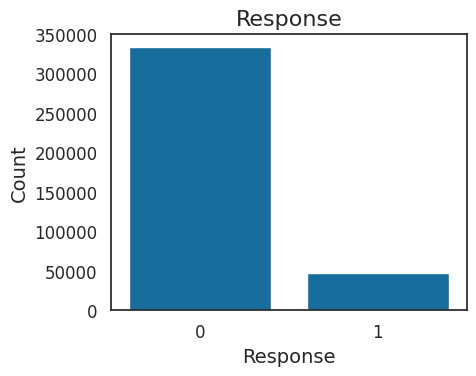

In [15]:
print(df["Response"].value_counts())

plt.figure(figsize=(5,4))

sns.countplot(x=df["Response"], data=df)
plt.title('Response')
plt.xlabel('Response')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- This dataset is highly imbalanced with respect to the Response.
- To handle imbalance in data, we shall do undersample for Response=0.
- We shall now create a new dataset which is balanced with respect to Response

### _Creating new_df_

In [16]:
# df = df1.copy()

In [17]:
df_response_0 = df[df['Response'] == 0].sample(n=71728, random_state=42)

df_response_1 = df[df['Response'] == 1]

new_df = pd.concat([df_response_0, df_response_1])

new_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [18]:
df.shape, new_df.shape

((380840, 11), (118413, 11))

In [19]:
df1 = df.copy()

In [20]:
df = new_df.copy()

In [21]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,45,1,28.0,0,1-2 Year,Yes,2630.0,26.0,283,0
1,Male,31,1,35.0,0,< 1 Year,Yes,27878.0,154.0,227,1
2,Male,56,1,28.0,1,1-2 Year,No,39232.0,26.0,155,0
3,Male,73,1,28.0,0,1-2 Year,Yes,58853.0,26.0,94,1
4,Female,33,1,46.0,0,1-2 Year,Yes,20251.0,157.0,142,1


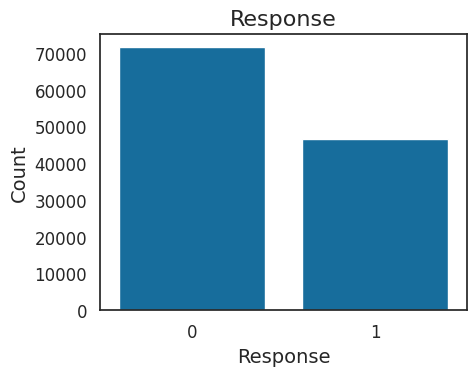

In [22]:
plt.figure(figsize=(5,4))

sns.countplot(x="Response", data=df)
plt.title('Response')
plt.xlabel('Response')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 1. Gender

In [23]:
df["Gender"] = df["Gender"].map(lambda x: 1 if x == "Male" else 0)

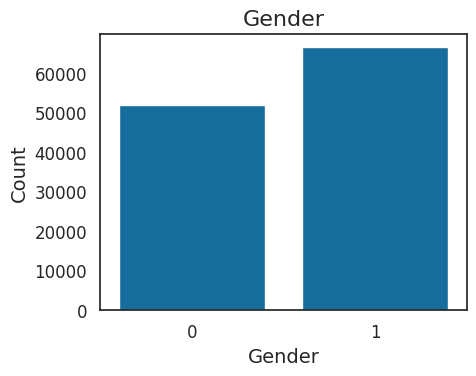

In [24]:
plt.figure(figsize=(5,4))

sns.countplot(x="Gender", data=df)
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 2. Age


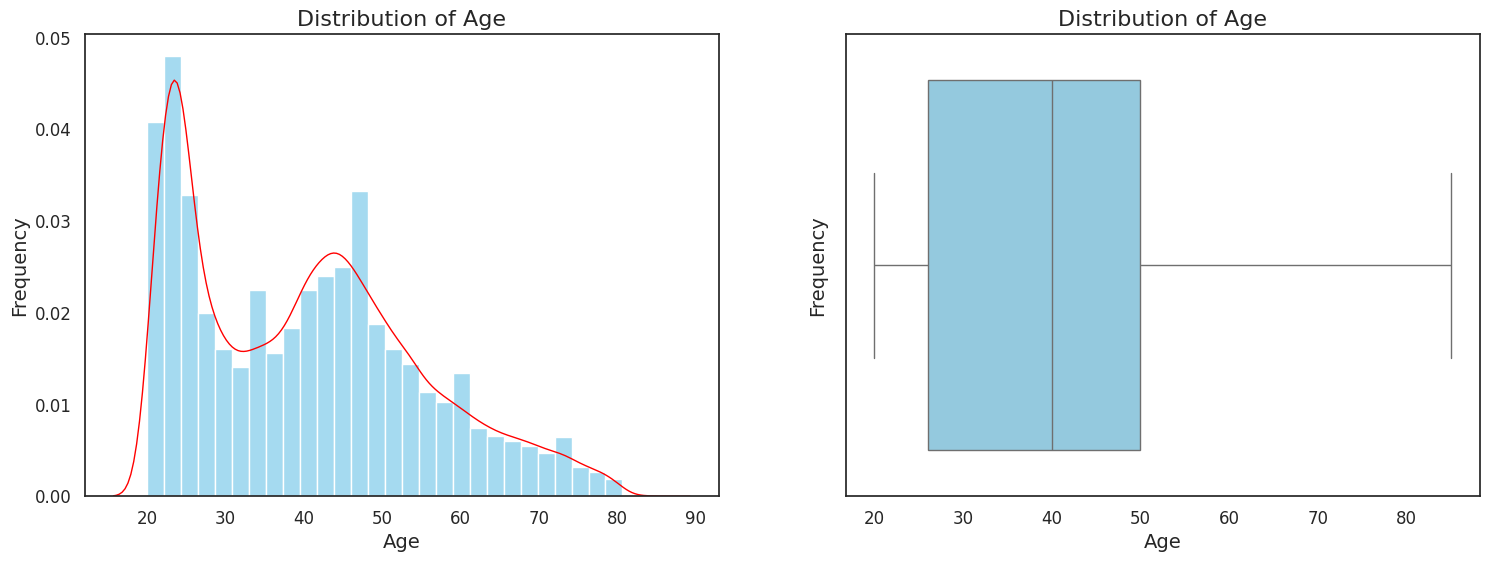

In [25]:
plt.figure(figsize=(18, 6))

# histogram and kde
plt.subplot(1,2,1)
sns.histplot(data=df, x="Age", bins=30, color="skyblue", stat="density")  # Ensure it's comparable
sns.kdeplot(data=df, x="Age", color="red", linewidth=1)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# box-plot
plt.subplot(1,2,2)
sns.boxplot(data=df, x="Age", color="skyblue")
plt.title('Boxplot of Age')
plt.xlabel('Age')

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## 3. Driving_License

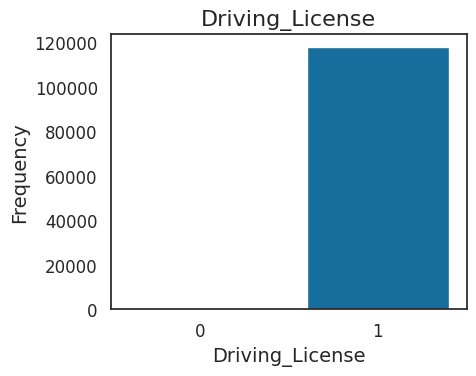

In [26]:
plt.figure(figsize=(5, 4))

sns.countplot(x="Driving_License", data=df)
plt.title('Driving_License')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

- We won't really need this feature. It is mostly degenerate.

In [27]:
df.drop(["Driving_License"], axis=1, inplace=True)

## 4. Region_Code

- Numeric values of Region_Code do not have any meaningful significance. It is better to treat them as categories.

In [28]:
df["Region_Code"] = df["Region_Code"].astype(int).astype(str)

In [29]:
np.unique(df["Region_Code"])

array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '5', '50', '51', '52', '6', '7', '8', '9'], dtype=object)

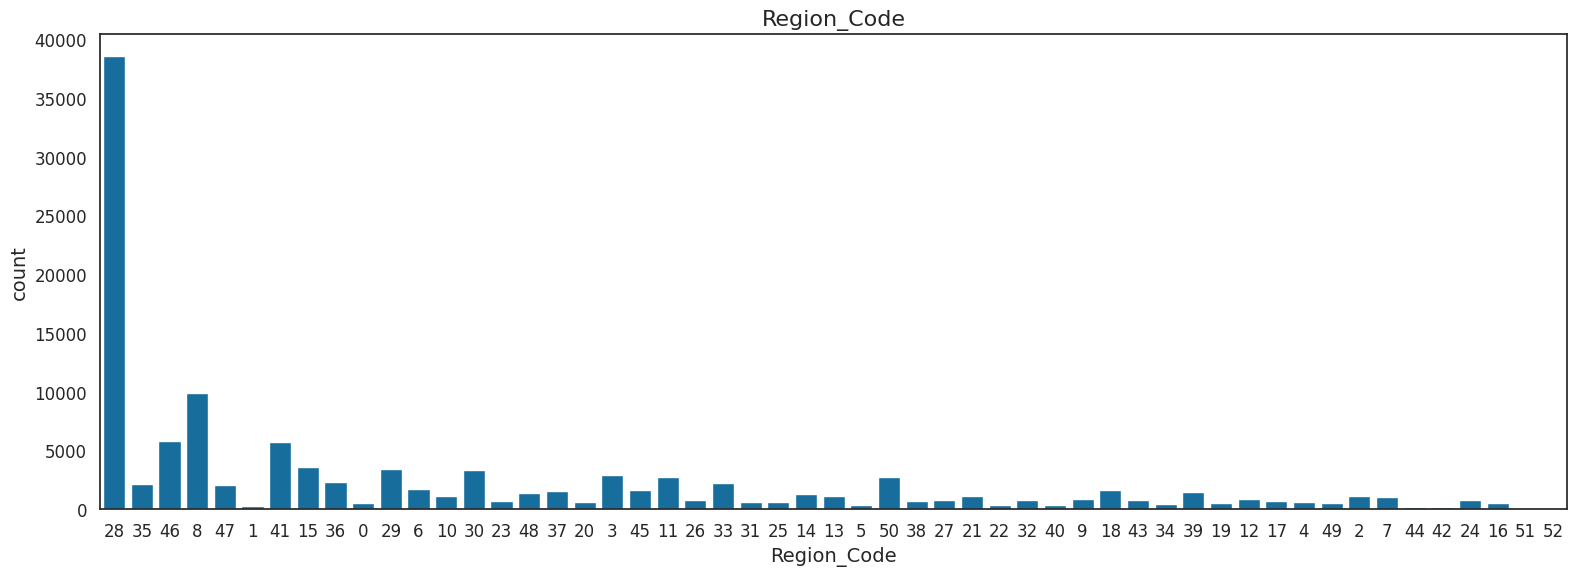

In [30]:
plt.figure(figsize=(16, 6))

sns.countplot(x="Region_Code", data=df)
plt.title('Region_Code')
plt.tight_layout()
plt.show()

## 5. Previously_Insured

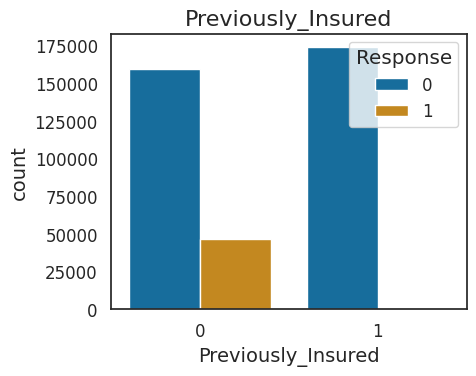

In [31]:
# Count plot from original data (df1)
plt.figure(figsize=(5, 4))

sns.countplot(x="Previously_Insured", hue="Response", data=df1)
plt.title('Previously_Insured')
plt.tight_layout()
plt.show()

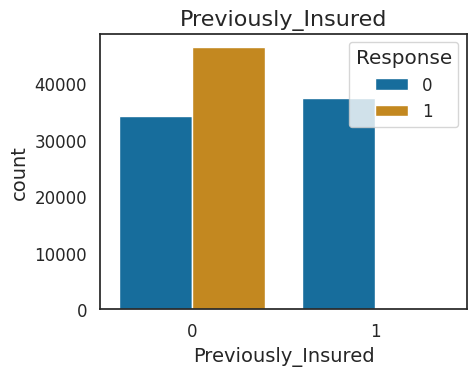

In [32]:
# Count plot on balanced data (df)
plt.figure(figsize=(5, 4))

sns.countplot(x="Previously_Insured", hue="Response", data=df)
plt.title('Previously_Insured')
plt.tight_layout()
plt.show()

## 6. Vehicle_Age

In [33]:
print(df["Vehicle_Age"].value_counts())

Vehicle_Age
1-2 Year     70261
< 1 Year     41052
> 2 Years     7100
Name: count, dtype: int64


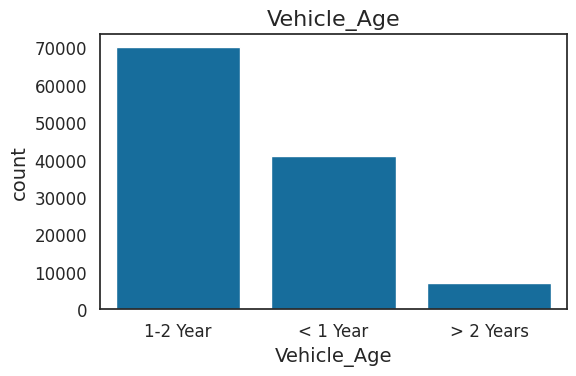

In [34]:
plt.figure(figsize=(6,4))

# df["Vehicle_Age"] = df["Vehicle_Age"].astype(int).astype(str)
sns.countplot(x="Vehicle_Age", data=df)
plt.title('Vehicle_Age')
plt.tight_layout()
plt.show()

In [35]:
vehicle_age_mapping = {'< 1 Year': 0,'1-2 Year': 1,'> 2 Years': 2}

df['Vehicle_Age'] = df['Vehicle_Age'].map(vehicle_age_mapping)


- This category is mostly binary. At the time of modeling, we need to consider this.

## 7. Vehicle_Damage

In [36]:
df["Vehicle_Damage"] = df["Vehicle_Damage"].map(lambda x: 1 if x == "Yes" else 0)

Vehicle_Damage
1    77113
0    41300
Name: count, dtype: int64


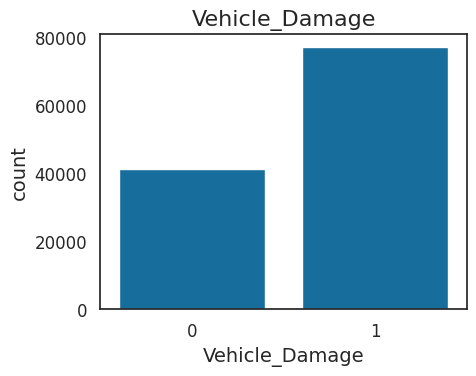

In [37]:
print(df["Vehicle_Damage"].value_counts())

plt.figure(figsize=(5,4))

sns.countplot(x="Vehicle_Damage", data=df)
plt.title('Vehicle_Damage')
plt.tight_layout()
plt.show()

## 8. Annual_Premium

In [38]:
df["Annual_Premium"].describe()

,Annual_Premium
count,118413.000000
mean,30884.738829
std,17547.888124
min,2630.000000
25%,24567.000000
50%,32072.000000
75%,40055.000000
max,540165.000000


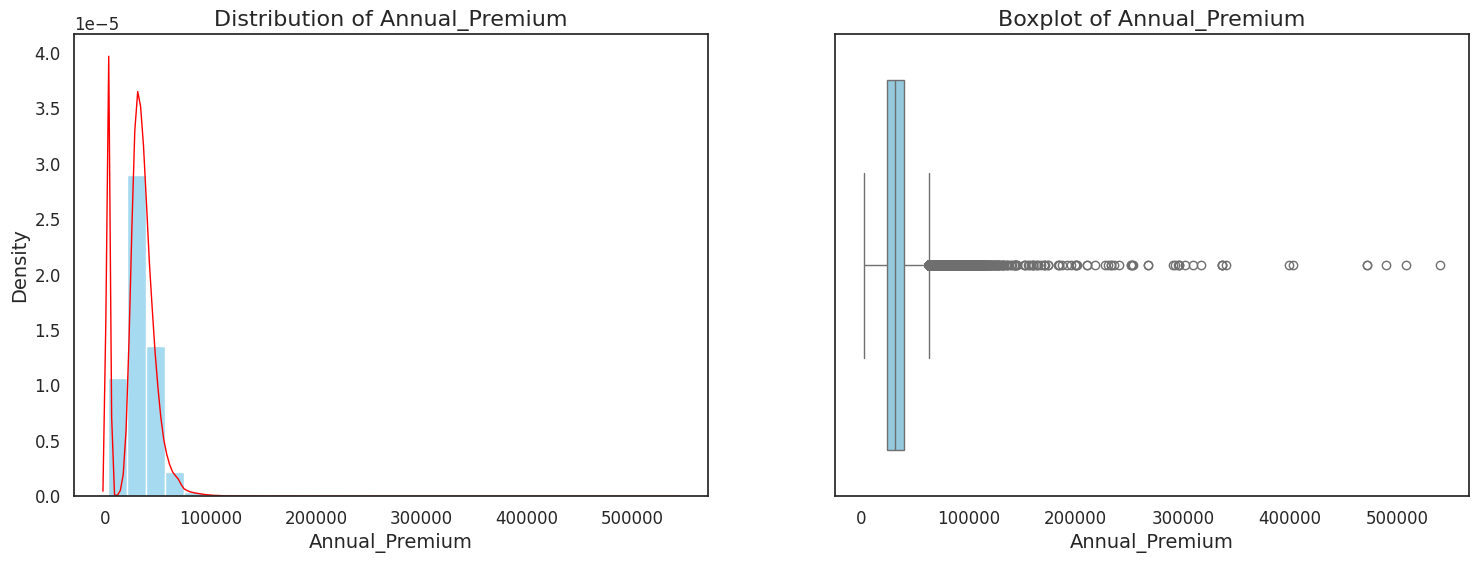

In [39]:
plt.figure(figsize=(18, 6))

# histogram and kde
plt.subplot(1,2,1)
sns.histplot(data=df, x="Annual_Premium", bins=30, color="skyblue", stat="density")  # Ensure it's comparable
sns.kdeplot(data=df, x="Annual_Premium", color="red", linewidth=1)
plt.title('Distribution of Annual_Premium')

# box-plot
plt.subplot(1,2,2)
sns.boxplot(data=df, x="Annual_Premium", color="skyblue")
plt.title('Boxplot of Annual_Premium')

plt.show()

### Handling Outliers

#### 1. Winsorization (capping)

In [40]:
# calculate IQR
Q1 = df["Annual_Premium"].quantile(0.25)
Q3 = df["Annual_Premium"].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("IQR: ", IQR)
print("lower_limit: ", lower_limit)
print("upper_limit: ", upper_limit)

IQR:  15488.0
lower_limit:  1335.0
upper_limit:  63287.0


In [41]:
df[df['Annual_Premium'] > upper_limit].shape

(3096, 10)

In [42]:
df['Annual_Premium_capped'] = df['Annual_Premium'].apply(lambda x: upper_limit if x > upper_limit else x)

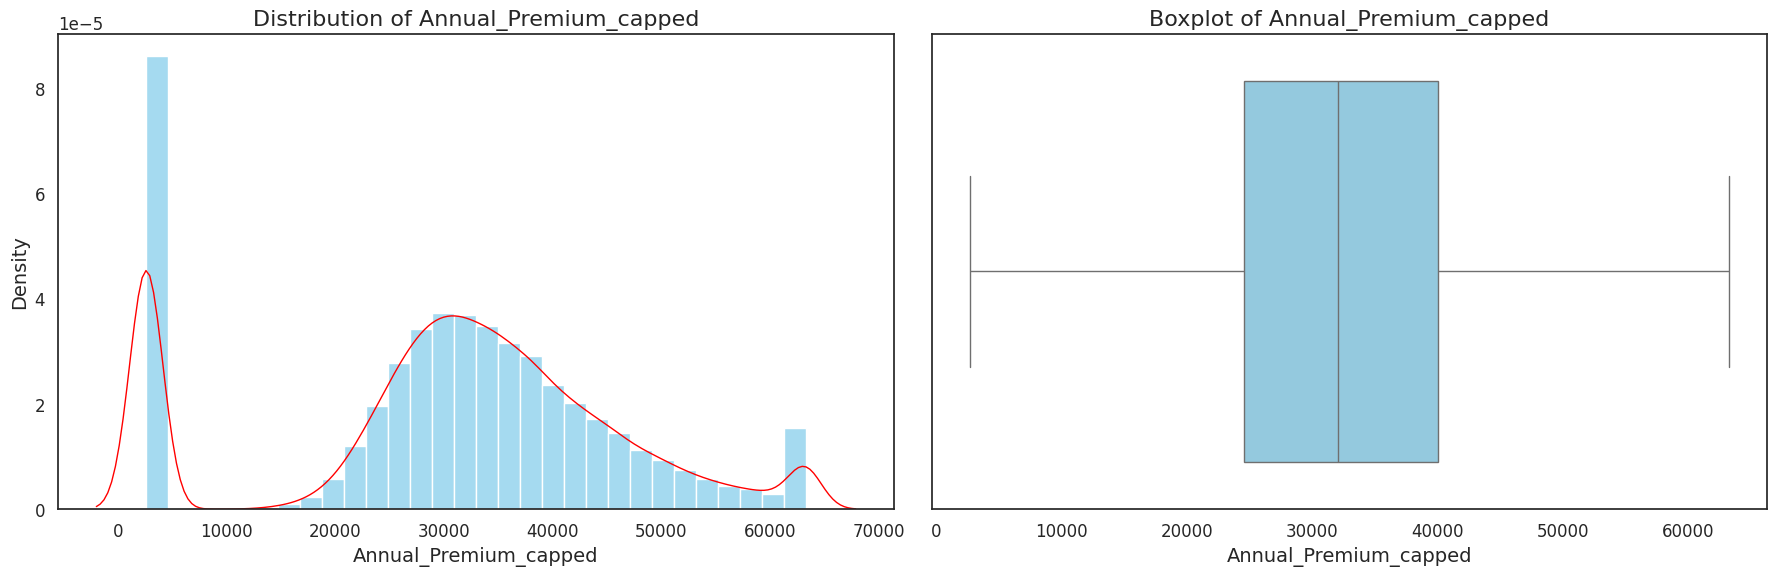

In [43]:
plt.figure(figsize=(18, 6))

# histogram and kde
plt.subplot(1,2,1)
sns.histplot(data=df, x="Annual_Premium_capped", bins=30, color="skyblue", stat="density")  # Ensure it's comparable
sns.kdeplot(data=df, x="Annual_Premium_capped", color="red", linewidth=1)
plt.title('Distribution of Annual_Premium_capped')

# box-plot
plt.subplot(1,2,2)
sns.boxplot(data=df, x="Annual_Premium_capped", color="skyblue")
plt.title('Boxplot of Annual_Premium_capped')

plt.tight_layout()
plt.show()

#### 2. Removing outliers

In [44]:
df_clean = df[(df["Annual_Premium"] >= lower_limit) & (df["Annual_Premium"] <= upper_limit)]
df_clean.shape, df.shape

((115317, 11), (118413, 11))

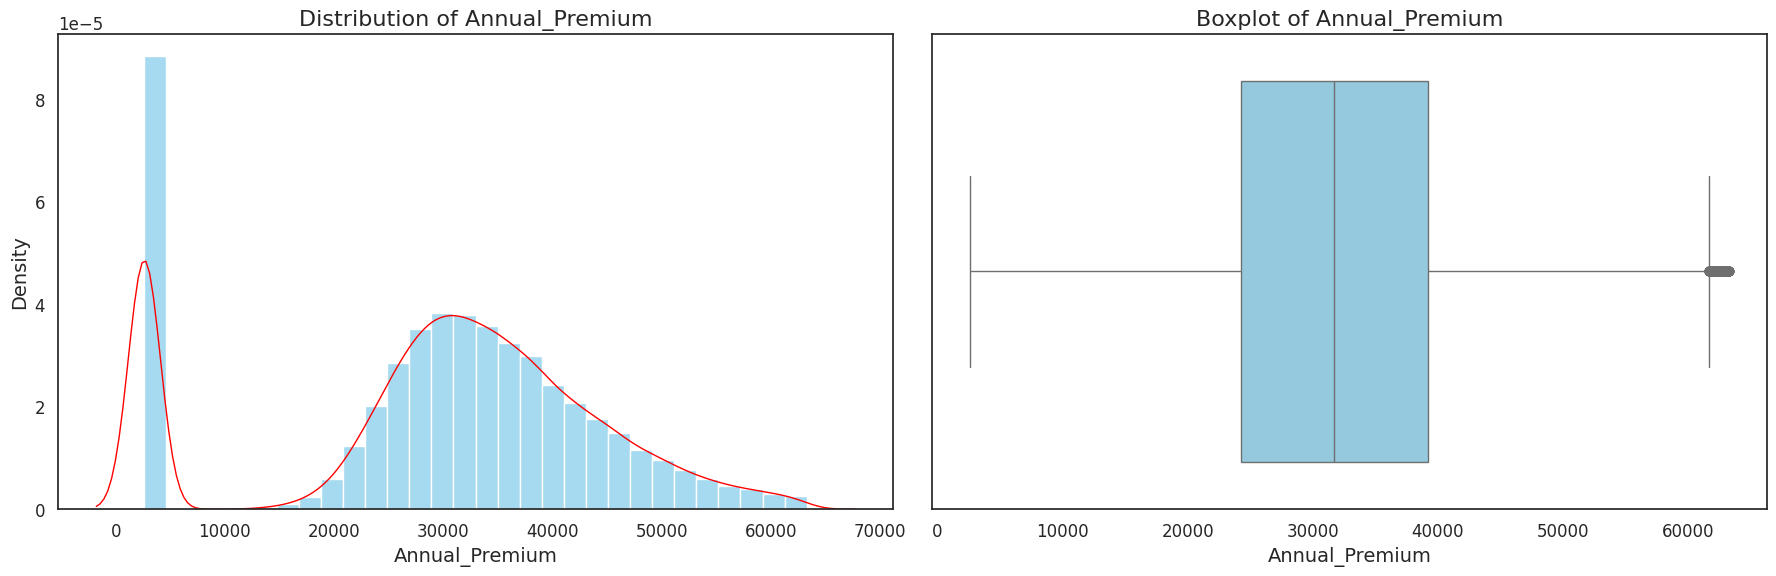

In [45]:
plt.figure(figsize=(18, 6))

# histogram and kde
plt.subplot(1,2,1)
sns.histplot(df_clean["Annual_Premium"], bins=30, color="skyblue", stat="density")  # Ensure it's comparable
sns.kdeplot(df_clean["Annual_Premium"], color="red", linewidth=1)
plt.title('Distribution of Annual_Premium')

# box-plot
plt.subplot(1,2,2)
sns.boxplot(x=df_clean["Annual_Premium"], color="skyblue")
plt.title('Boxplot of Annual_Premium')

plt.tight_layout()
plt.show()

In [46]:
df2 = df.copy()
df = df_clean.copy()

## 9. Policy_Sales_Channel

In [47]:
df["Policy_Sales_Channel"] = df["Policy_Sales_Channel"].astype(int)

In [48]:
df["Policy_Sales_Channel"].nunique()

143

Policy_Sales_Channel
152    31494
26     28407
124    26092
160     4955
156     3998
122     3260
157     2863
154     2429
163     1308
151      941
25       623
13       604
155      568
7        465
30       410
8        406
55       365
11       358
125      309
52       285
12       257
29       255
31       252
15       252
1        248
158      224
3        222
24       221
120      220
4        182
Name: count, dtype: int64


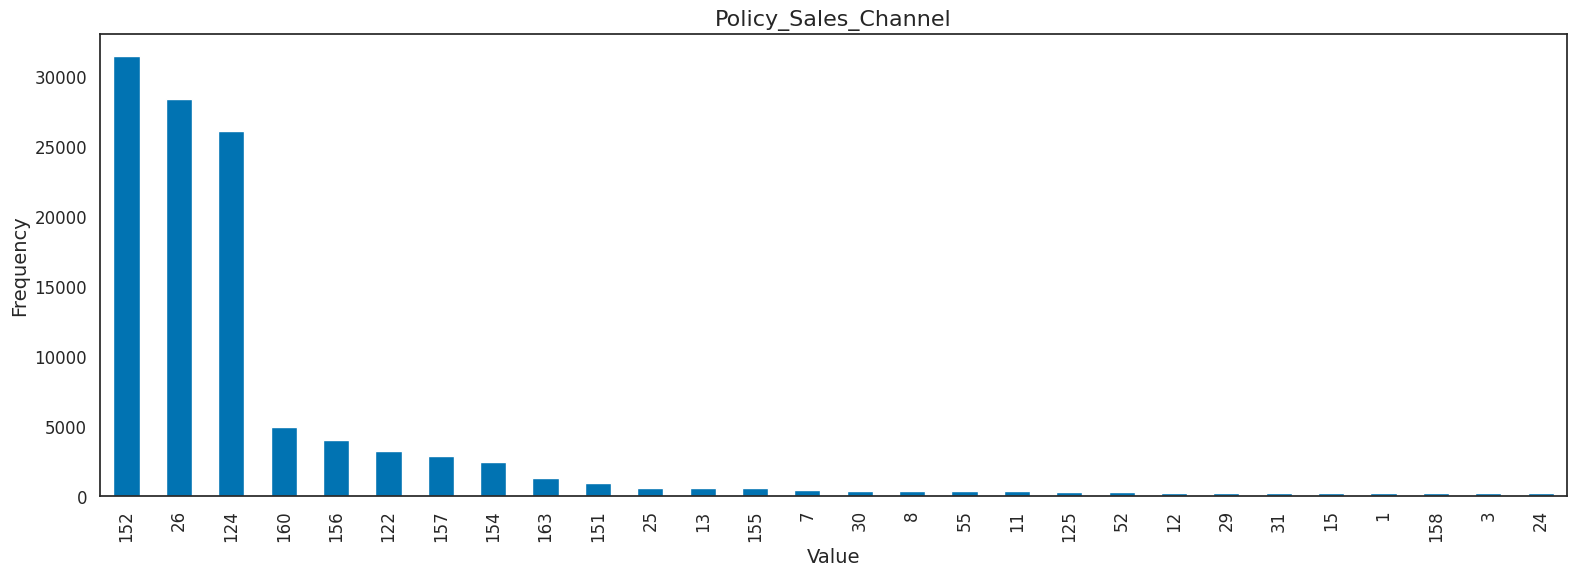

In [49]:
print(df["Policy_Sales_Channel"].value_counts()[:30])

plt.figure(figsize=(16, 6))
df["Policy_Sales_Channel"].value_counts()[:28].plot(kind="bar")
plt.title('Policy_Sales_Channel')
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.tight_layout()
plt.show()

In [50]:
plolicy_sales = df["Policy_Sales_Channel"].value_counts()[:23].index

In [51]:
print(plolicy_sales)

Index([152,  26, 124, 160, 156, 122, 157, 154, 163, 151,  25,  13, 155,   7,
        30,   8,  55,  11, 125,  52,  12,  29,  31],
      dtype='int64', name='Policy_Sales_Channel')


In [52]:
df.shape

(115317, 11)

In [53]:
df_clean2 = df[df["Policy_Sales_Channel"].isin(plolicy_sales)]

In [54]:
df_clean2.shape

(110904, 11)

In [55]:
df3 = df.copy()
df = df_clean2.copy()

## 10. Vintage

In [56]:
df["Vintage"].describe()

,Vintage
count,110904.000000
mean,154.416558
std,83.812760
min,10.000000
25%,82.000000
50%,154.000000
75%,227.000000
max,299.000000


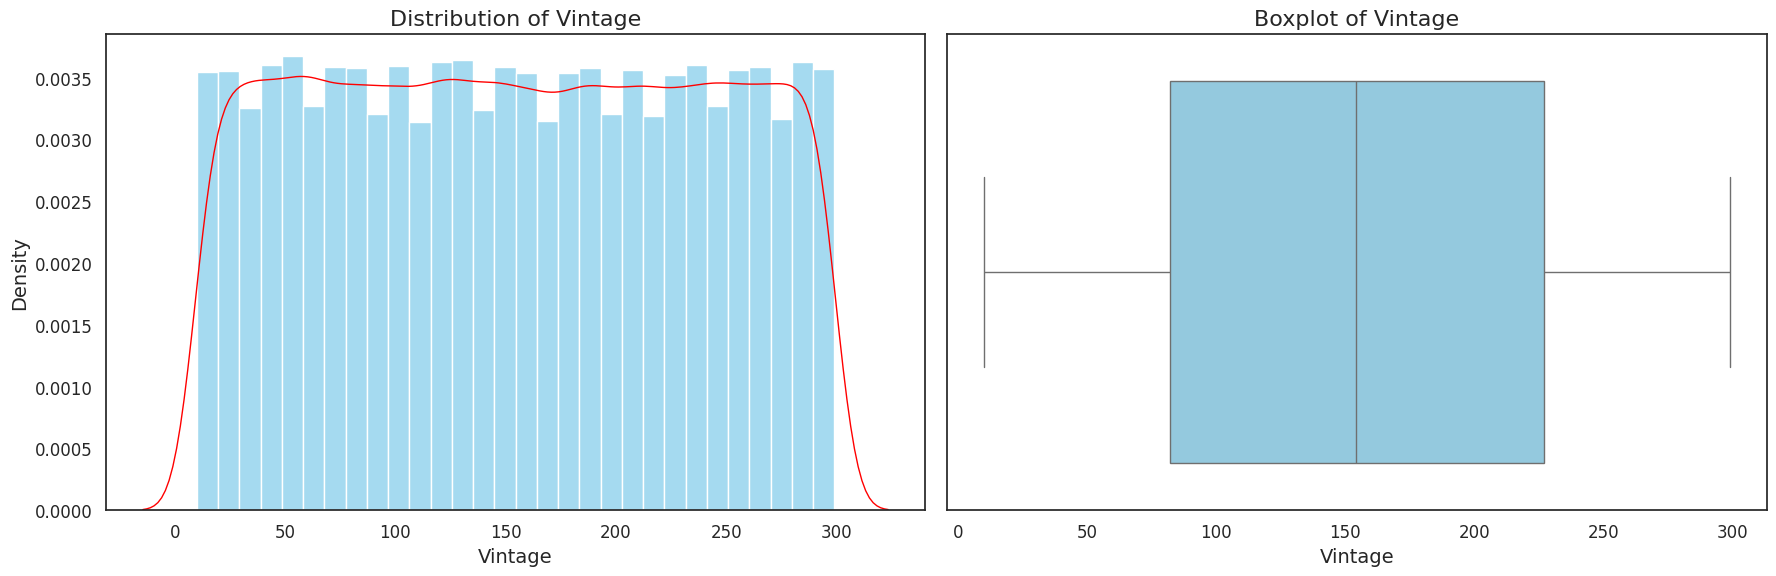

In [57]:
plt.figure(figsize=(18, 6))

# histogram and kde
plt.subplot(1,2,1)
sns.histplot(df_clean["Vintage"], bins=30, color="skyblue", stat="density")  # Ensure it's comparable
sns.kdeplot(df_clean["Vintage"], color="red", linewidth=1)
plt.title('Distribution of Vintage')

# box-plot
plt.subplot(1,2,2)
sns.boxplot(x=df_clean["Vintage"], color="skyblue")
plt.title('Boxplot of Vintage')

plt.tight_layout()
plt.show()

# Bivariate Analysis - EDA

In [58]:
df.head(1)

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_capped
0,1,45,28,0,1,1,2630.0,26,283,0,2630.0


## 1. Gender & Response

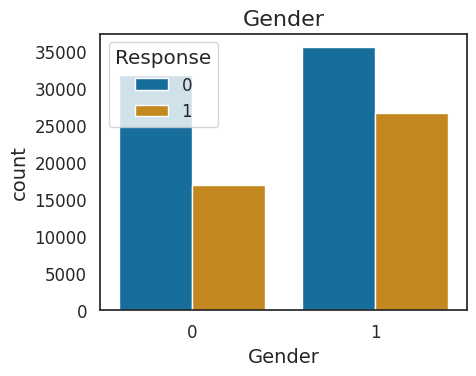

In [59]:
plt.figure(figsize=(5,4))

sns.countplot(x=df["Gender"], hue="Response", data=df)
plt.title('Gender')
plt.tight_layout()
plt.show()

## 2. Age & Response

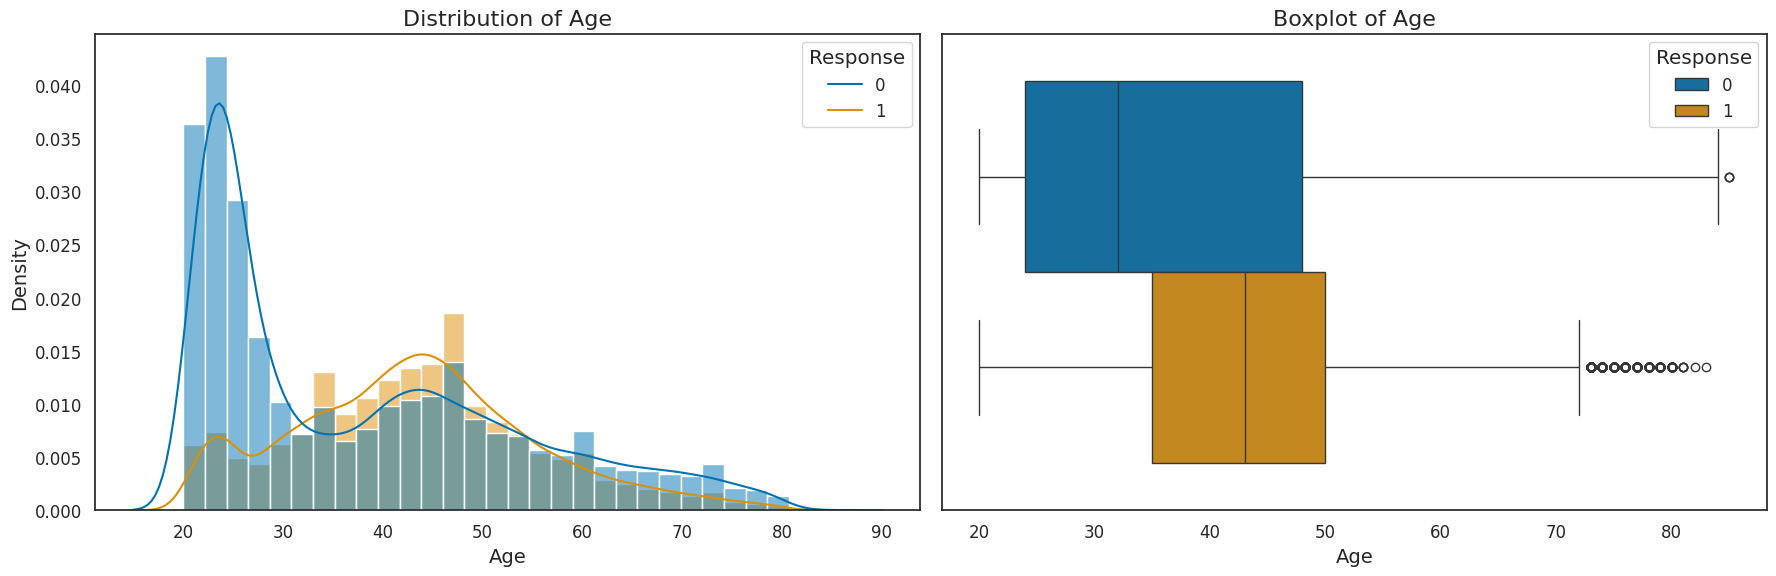

In [60]:
plt.figure(figsize=(18, 6))

# histogram and kde
plt.subplot(1,2,1)
sns.histplot(data=df, x="Age", hue="Response", bins=30, stat="density")
sns.kdeplot(data=df, x="Age", hue="Response")
plt.title('Distribution of Age')

# box-plot
plt.subplot(1,2,2)
sns.boxplot(data=df, x="Age", hue="Response")
plt.title('Boxplot of Age')

plt.tight_layout()
plt.show()

##### Observation:
There’s a clear age-based pattern:

- `Non-responders (0)` peak around `20–30 years`, meaning younger individuals are less likely to take insurance.

- `Responders (1)` show more density around `35–50 years`, suggesting mid-aged people are more likely to purchase insurance.

- After age 50, both groups thin out, but some insured people extend into older ages as well.

- Those who bought insurance tend to be older and more consistent in age than non-responders.

## 4. Region_Code	& Response

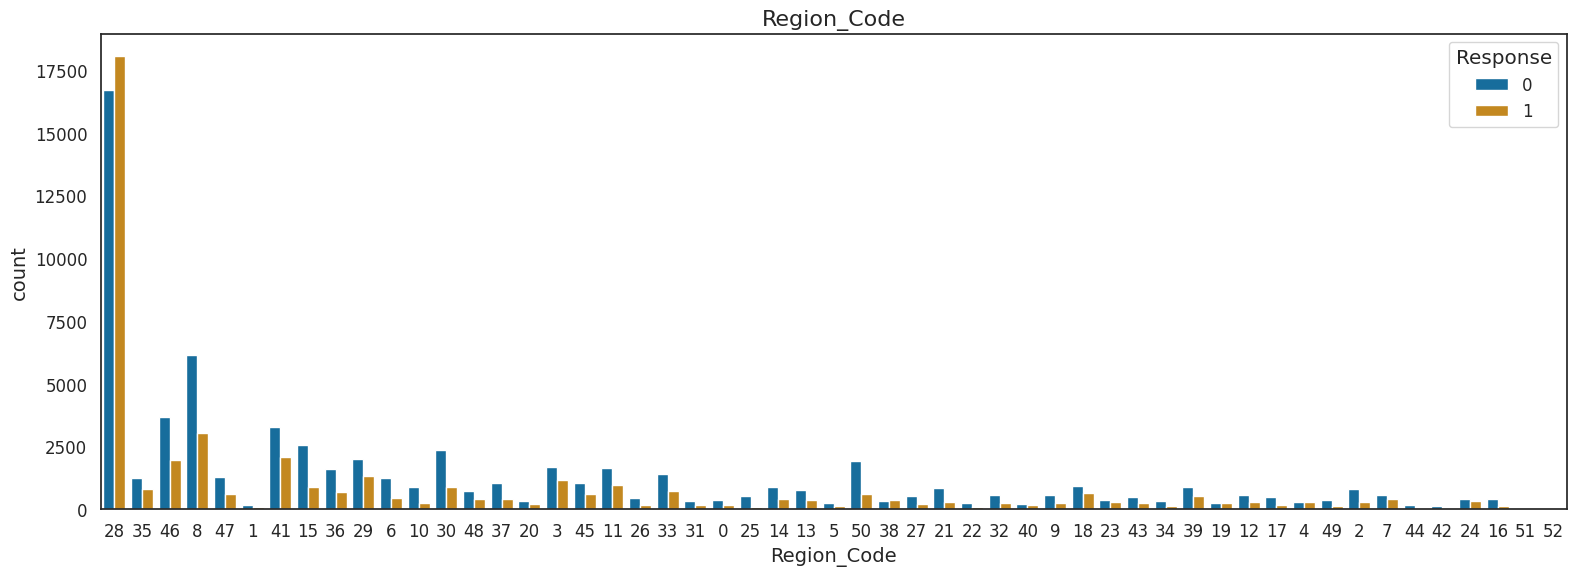

In [61]:
plt.figure(figsize=(16, 6))

sns.countplot(x=df["Region_Code"], hue="Response", data=df)
plt.title('Region_Code')
plt.tight_layout()
plt.show()

## 5. Previously_Insured & Response

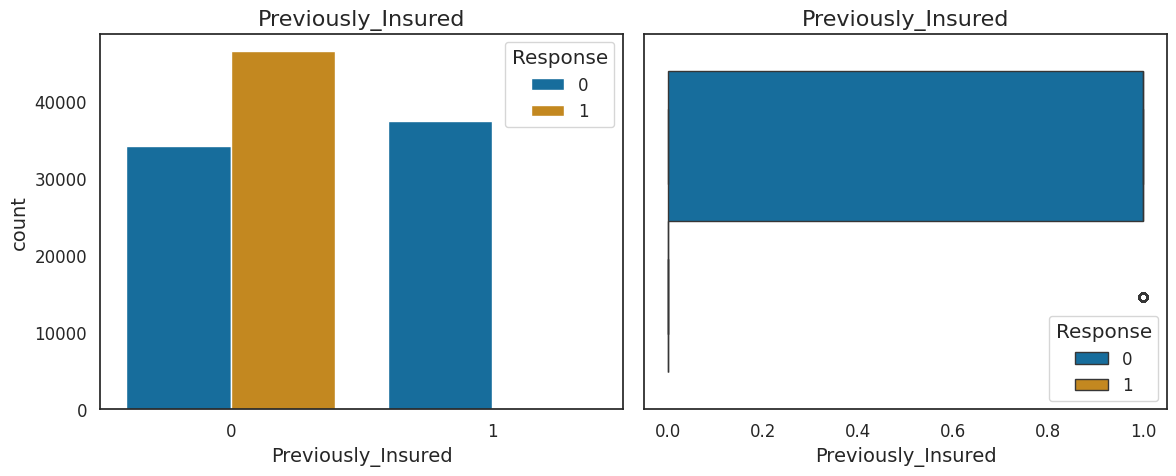

In [62]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
sns.countplot(x="Previously_Insured", hue="Response", data=new_df)
plt.title('Previously_Insured')

plt.subplot(1,2,2)
sns.boxplot(x="Previously_Insured", hue="Response", data=new_df)
plt.title('Previously_Insured')

plt.tight_layout()
plt.show()

##### Observations:
- The previously insured group is saturated — they rarely respond positively to new offers.
The not previously insured group is your main target market.

- `Previously_Insured` is a highly discriminative feature — it strongly separates responders from non-responders.

In [63]:
pd.crosstab(df['Previously_Insured'], df['Response'], margins=True)

Response,0,1,All
Previously_Insured,,,
0,31805,43439,75244
1,35511,149,35660
All,67316,43588,110904


- There’s a severe class imbalance overall (Response=0 dominates).

- There’s also a strong dependency between Previously_Insured and Response — customers who were previously insured are almost never responding positively (only 158 cases).

In [64]:
pd.crosstab(df1['Previously_Insured'], df1['Response'], margins=True)

Response,0,1,All
Previously_Insured,,,
0,159809,46527,206336
1,174346,158,174504
All,334155,46685,380840


## 6. Vehicle_Age &	Response

Vehicle_Age
1    64757
0    39803
2     6344
Name: count, dtype: int64


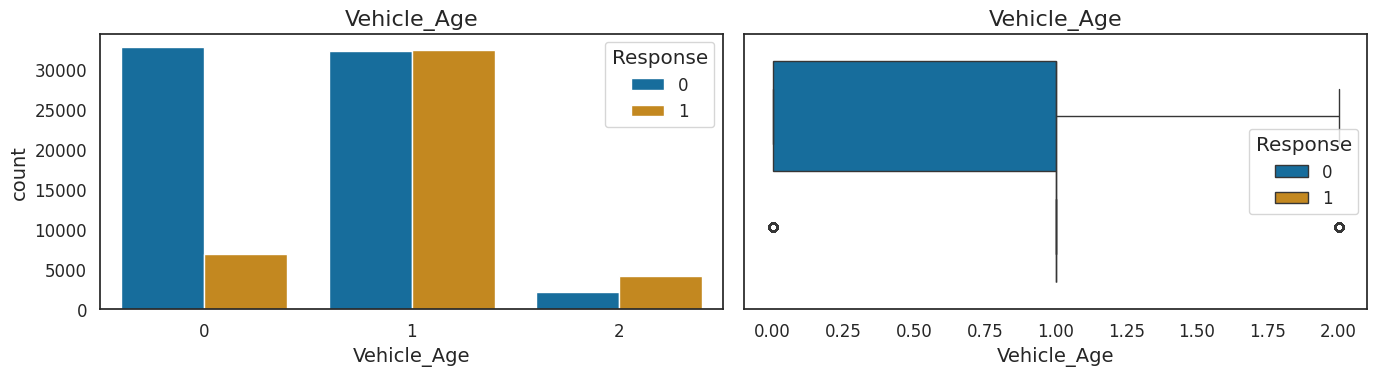

In [65]:
print(df["Vehicle_Age"].value_counts())

plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.countplot(x="Vehicle_Age", hue="Response", data=df)
plt.title('Vehicle_Age')

plt.subplot(1,2,2)
sns.boxplot(x="Vehicle_Age", hue="Response", data=df)
plt.title('Vehicle_Age')

plt.tight_layout()
plt.show()

##### Observations:
- As vehicle age increases, the likelihood of response increases.

- People with older vehicles may perceive higher risk of damage or breakdown, so they’re more likely to opt for insurance.

- Older vehicles stand out — though fewer in number, they contribute strongly to positive responses.

##### Business Insights:
- New car owners may already have insurance (possibly dealer-provided), so they show less interest.

- Older vehicle owners are key prospects — marketing efforts should target them more heavily.

- Medium-age owners are in between — a mix of new buyers and renewers.

## 7. Vehicle_Damage & Response

Vehicle_Damage
1    71951
0    38953
Name: count, dtype: int64


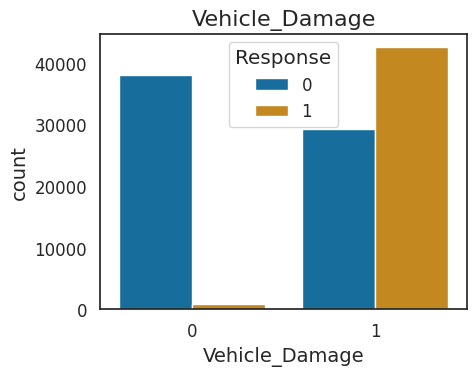

In [66]:
print(df["Vehicle_Damage"].value_counts())

plt.figure(figsize=(5,4))

sns.countplot(x="Vehicle_Damage", hue="Response", data=df)
plt.title('Vehicle_Damage')
plt.tight_layout()
plt.show()

## 8. Annual_Premium & Response

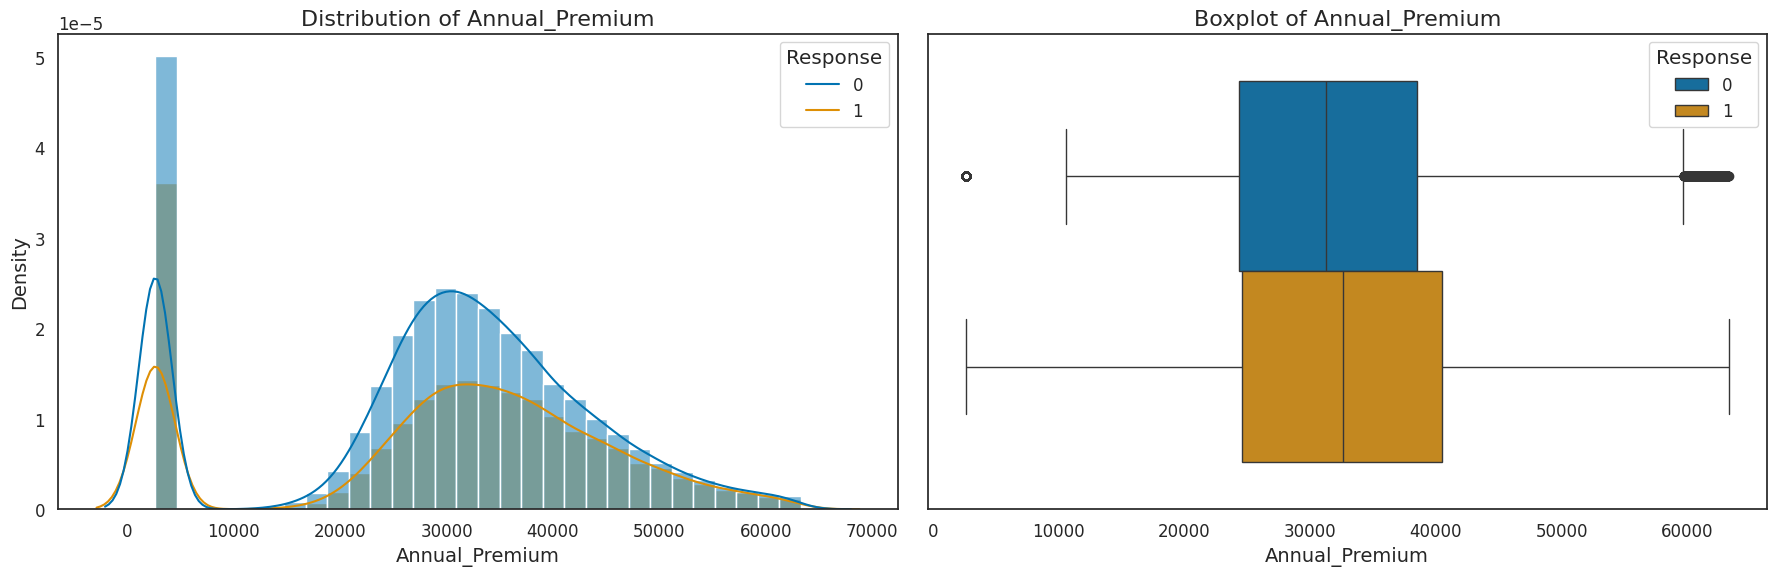

In [67]:
plt.figure(figsize=(18, 6))

# histogram and kde
plt.subplot(1,2,1)
sns.histplot(data=df, x="Annual_Premium", hue="Response", bins=30, stat="density")
sns.kdeplot(data=df, x="Annual_Premium", hue="Response")
plt.title('Distribution of Annual_Premium')

# box-plot
plt.subplot(1,2,2)
sns.boxplot(data=df, x="Annual_Premium", hue="Response")
plt.title('Boxplot of Annual_Premium')

plt.tight_layout()
plt.show()

Annual_Premium_capped and Response

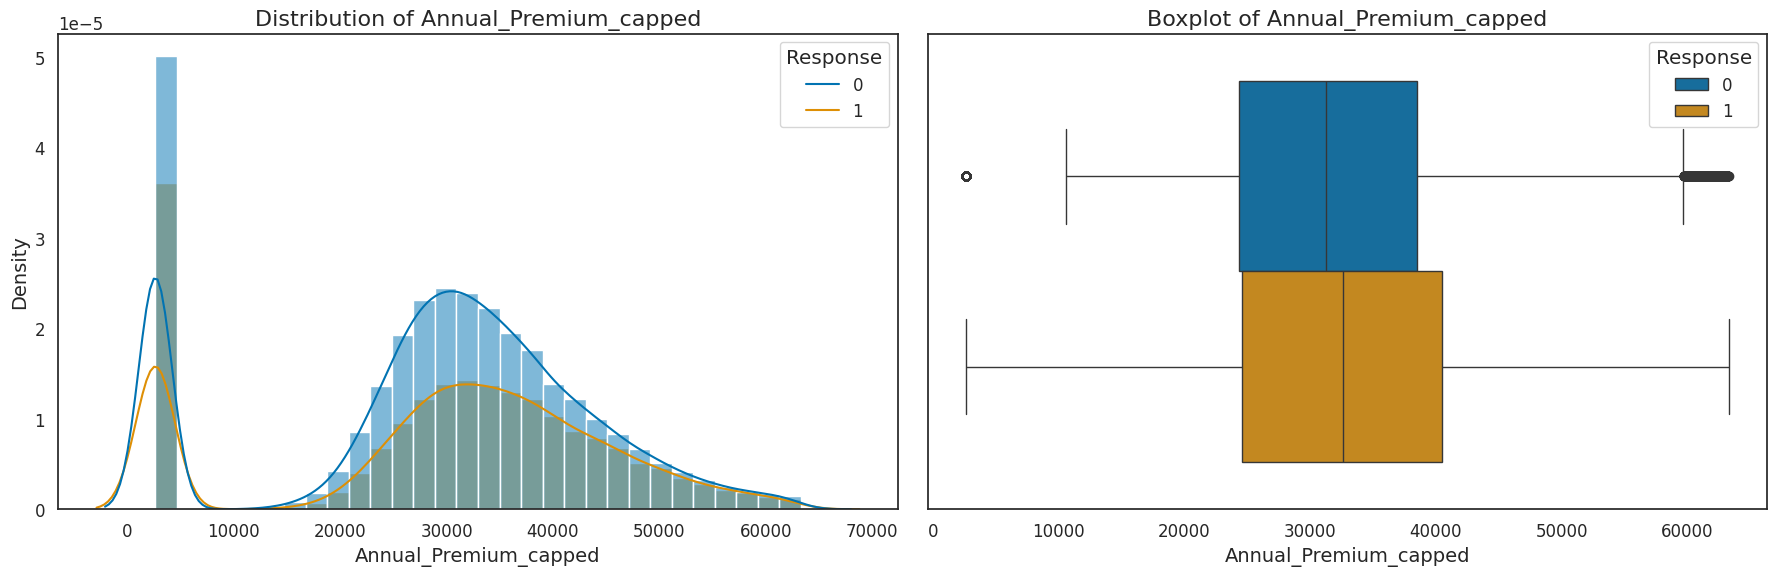

In [68]:
plt.figure(figsize=(18, 6))

# histogram and kde
plt.subplot(1,2,1)
sns.histplot(data=df, x="Annual_Premium_capped", hue="Response", bins=30, stat="density")
sns.kdeplot(data=df, x="Annual_Premium_capped", hue="Response")
plt.title('Distribution of Annual_Premium_capped')

# box-plot
plt.subplot(1,2,2)
sns.boxplot(data=df, x="Annual_Premium_capped", hue="Response")
plt.title('Boxplot of Annual_Premium_capped')

plt.tight_layout()
plt.show()

##### Observations:
-

## 9. Policy_Sales_Channel & Response

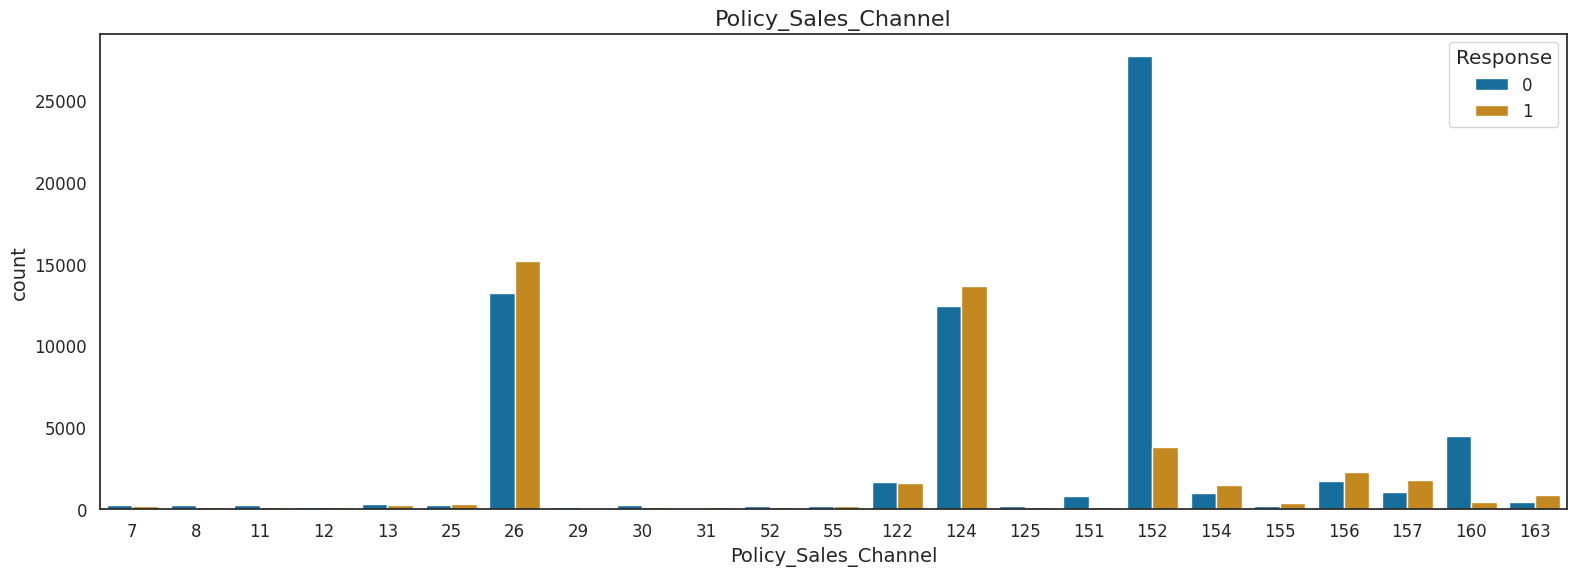

In [69]:
plt.figure(figsize=(16,6))

sns.countplot(x="Policy_Sales_Channel", hue="Response", data=df)
plt.title('Policy_Sales_Channel')
plt.tight_layout()
plt.show()

## 10. Vintage & Response

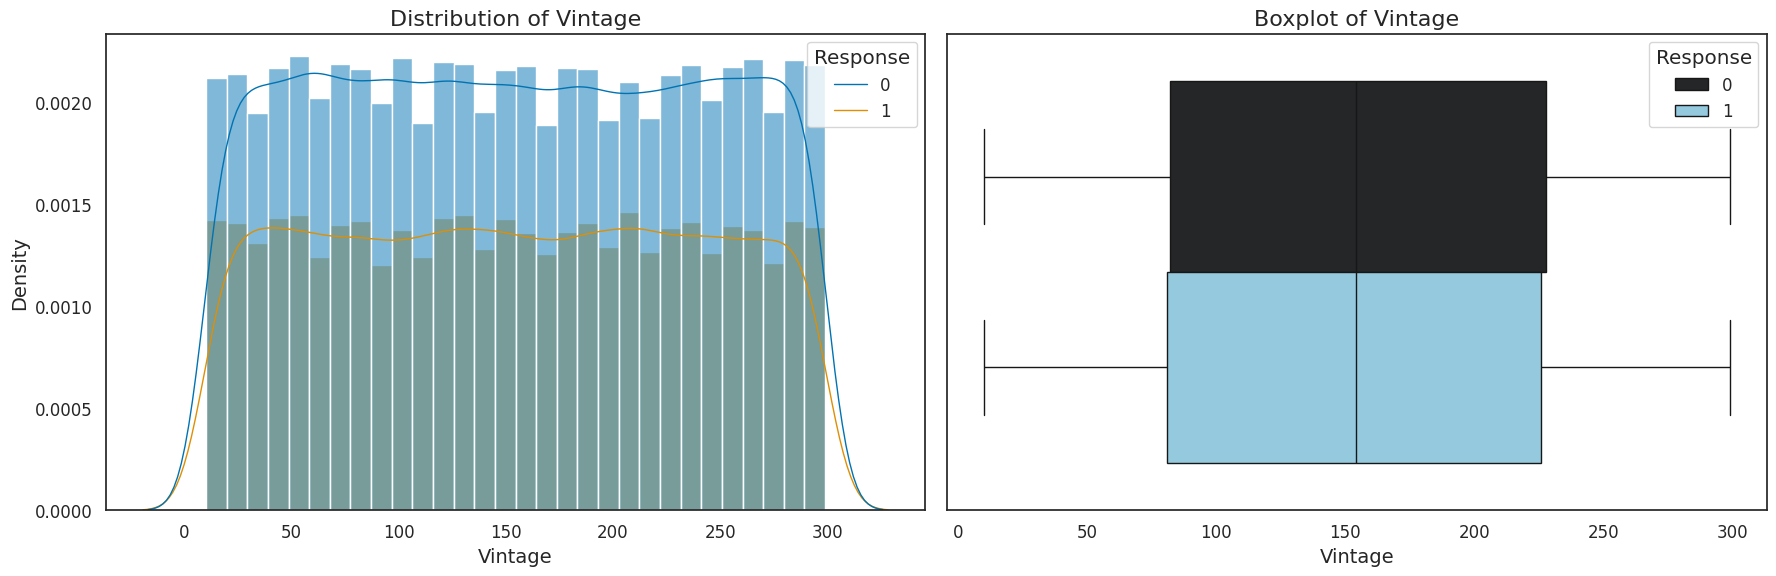

In [70]:
plt.figure(figsize=(18, 6))

# histogram and kde
plt.subplot(1,2,1)
sns.histplot(data=df_clean, x="Vintage", hue="Response", bins=30, color="skyblue", stat="density")
sns.kdeplot(data=df_clean, x="Vintage", hue="Response", color="red", linewidth=1)
plt.title('Distribution of Vintage')

# box-plot
plt.subplot(1,2,2)
sns.boxplot(data=df_clean, x="Vintage", hue="Response", color="skyblue")
plt.title('Boxplot of Vintage')

plt.tight_layout()
plt.show()

## HeatMap

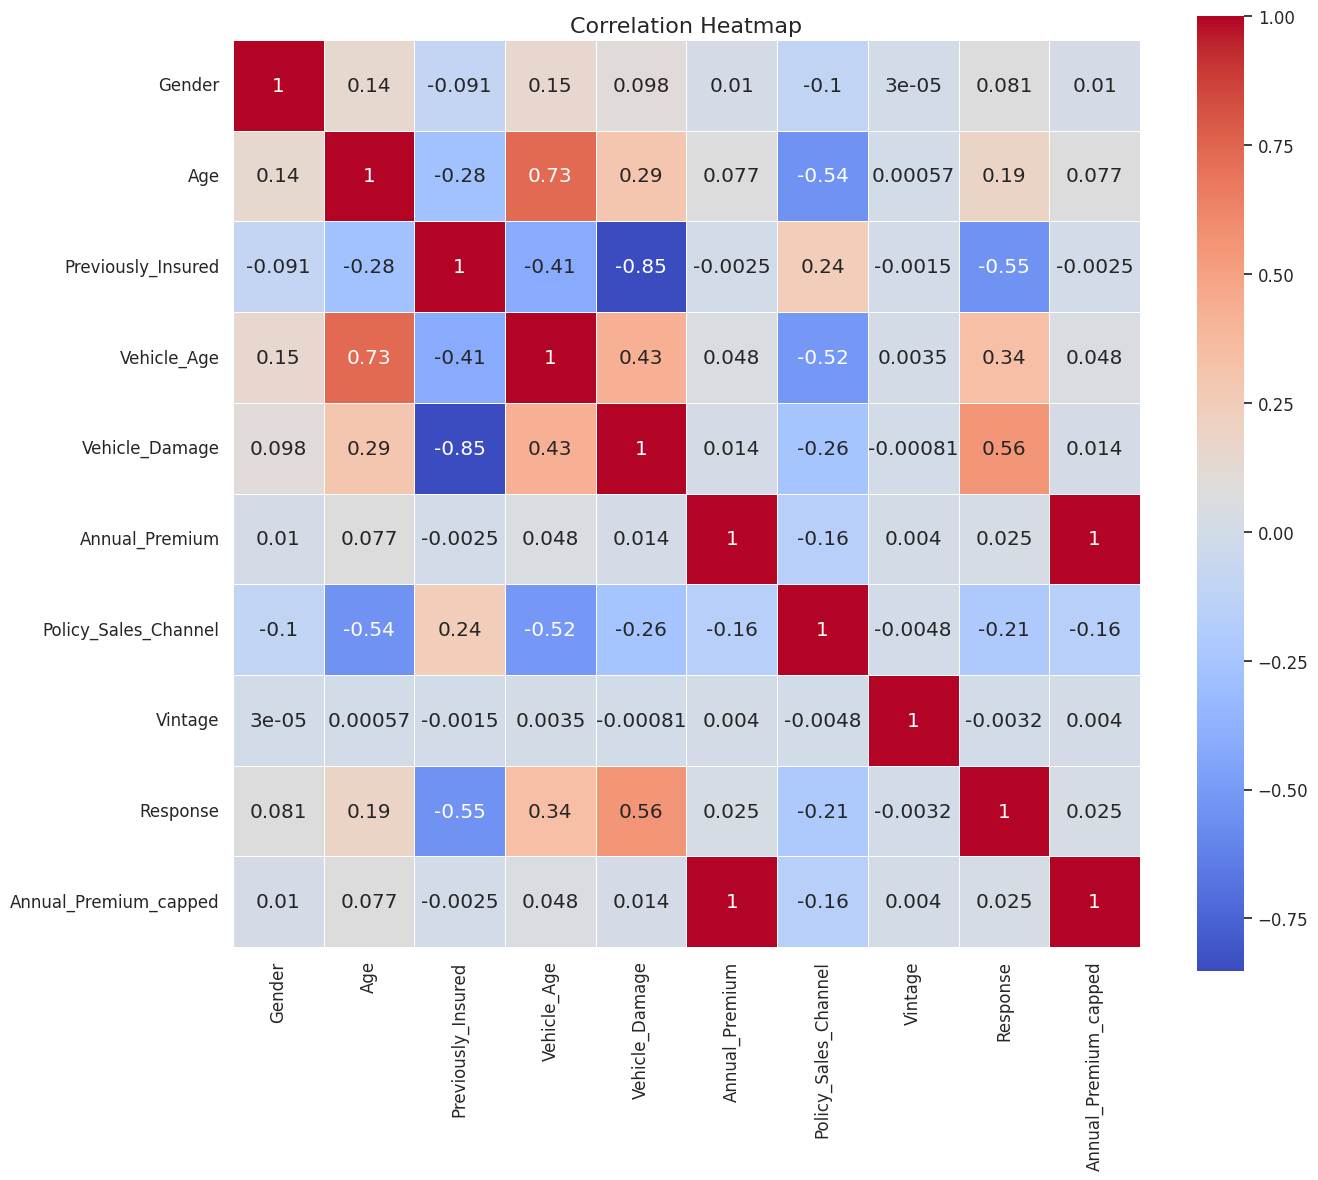

In [71]:
# correlation matrix
corr_matrix = df.corr(numeric_only=True)

# create a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


# Modeling

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110904 entries, 0 to 118412
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Gender                 110904 non-null  int64  
 1   Age                    110904 non-null  int64  
 2   Region_Code            110904 non-null  object 
 3   Previously_Insured     110904 non-null  int64  
 4   Vehicle_Age            110904 non-null  int64  
 5   Vehicle_Damage         110904 non-null  int64  
 6   Annual_Premium         110904 non-null  float64
 7   Policy_Sales_Channel   110904 non-null  int64  
 8   Vintage                110904 non-null  int64  
 9   Response               110904 non-null  int64  
 10  Annual_Premium_capped  110904 non-null  float64
dtypes: float64(2), int64(8), object(1)
memory usage: 10.2+ MB


In [73]:
df

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_capped
0,1,45,28,0,1,1,2630.0,26,283,0,2630.0
1,1,31,35,0,0,1,27878.0,154,227,1,27878.0
2,1,56,28,1,1,0,39232.0,26,155,0,39232.0
3,1,73,28,0,1,1,58853.0,26,94,1,58853.0
4,0,33,46,0,1,1,20251.0,157,142,1,20251.0
...,...,...,...,...,...,...,...,...,...,...,...
118408,0,47,28,0,2,1,48811.0,26,159,1,48811.0
118409,0,54,28,0,1,1,40472.0,26,222,1,40472.0
118410,0,37,28,0,1,1,34540.0,26,32,1,34540.0
118411,0,24,32,0,0,1,33329.0,152,17,0,33329.0


## 1. Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
# get dummies for region code
df_enc = pd.get_dummies(df, columns=["Region_Code"], drop_first=True)
print(df_enc.shape)
df_enc.head()

(110904, 62)


,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_capped,...,Region_Code_48,Region_Code_49,Region_Code_5,Region_Code_50,Region_Code_51,Region_Code_52,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9
0,1,45,0,1,1,2630.0,26,283,0,2630.0,...,False,False,False,False,False,False,False,False,False,False
1,1,31,0,0,1,27878.0,154,227,1,27878.0,...,False,False,False,False,False,False,False,False,False,False
2,1,56,1,1,0,39232.0,26,155,0,39232.0,...,False,False,False,False,False,False,False,False,False,False
3,1,73,0,1,1,58853.0,26,94,1,58853.0,...,False,False,False,False,False,False,False,False,False,False
4,0,33,0,1,1,20251.0,157,142,1,20251.0,...,False,False,False,False,False,False,False,False,False,False


In [77]:
# X = df.drop(columns=["Response","Region_Code","Annual_Premium_capped"])
# y = df["Response"]

X = df_enc.drop(columns=["Response","Annual_Premium_capped"])
y = df_enc["Response"]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [80]:
X_train.head(2)

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Region_Code_1,Region_Code_10,...,Region_Code_48,Region_Code_49,Region_Code_5,Region_Code_50,Region_Code_51,Region_Code_52,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9
0,0.88286,-0.804030,1.453609,-1.225845,-1.361625,0.217449,0.803232,-1.198311,-0.050647,-0.103758,...,-0.101459,-0.066017,-0.059501,-0.153447,-0.022527,-0.024906,-0.122987,-0.094542,-0.300162,-0.085508
1,0.88286,0.495595,-0.687943,0.528699,0.734417,-1.810637,0.876263,-0.888035,-0.050647,-0.103758,...,-0.101459,-0.066017,-0.059501,-0.153447,-0.022527,-0.024906,-0.122987,-0.094542,-0.300162,-0.085508


In [81]:
# Model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Confusion_matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78     13484
           1       0.65      0.87      0.75      8697

    accuracy                           0.77     22181
   macro avg       0.77      0.79      0.77     22181
weighted avg       0.80      0.77      0.77     22181

Confusion_matrix:
[[9416 4068]
 [1107 7590]]


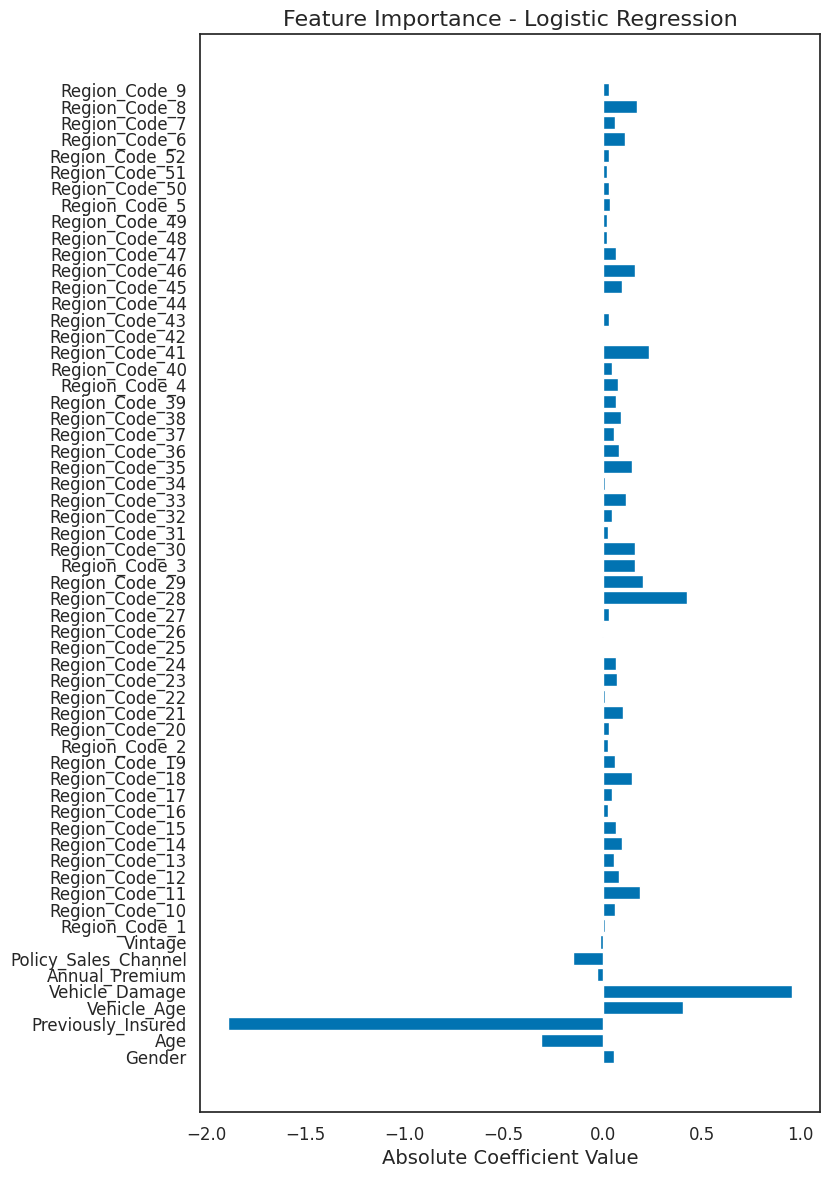

In [82]:
# Get feature importance (absolute value of coefficients)
importance_lr = lr.coef_[0]
feature_names = X.columns

# Plot
plt.figure(figsize=(8,14))
plt.barh(feature_names, importance_lr)
plt.xlabel("Absolute Coefficient Value")
plt.title("Feature Importance - Logistic Regression")
plt.show()


In [83]:
from sklearn.metrics import roc_curve, auc

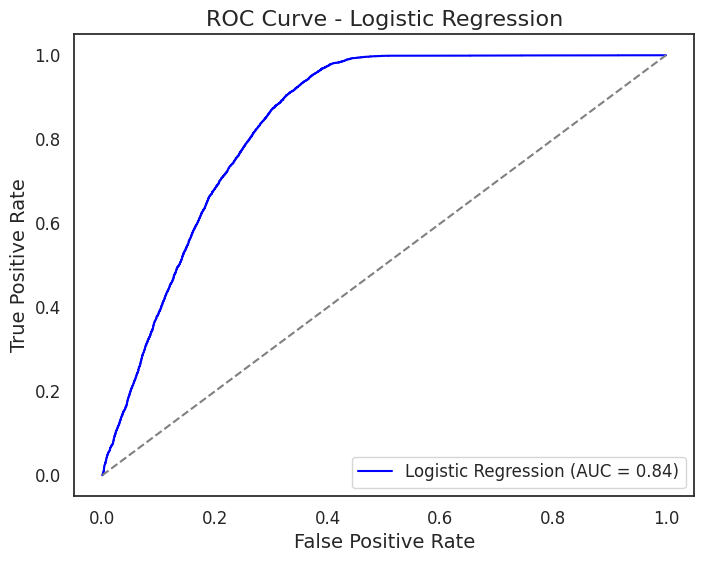

In [84]:
# Get predicted probabilities for class 1
y_pred_proba = lr.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


## Imbalance handling

In [85]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [86]:
print("Before SMOTE (train):", Counter(y_train))
print("Test set distribution:", Counter(y_test))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE (train):", Counter(y_train_resampled))

# Optional: convert back to DataFrame
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X.columns)


Before SMOTE (train): Counter({0: 53832, 1: 34891})
Test set distribution: Counter({0: 13484, 1: 8697})
After SMOTE (train): Counter({0: 53832, 1: 53832})


In [87]:
# Model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("confusion_matrix")
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.62      0.75     13484
           1       0.62      0.96      0.75      8697

    accuracy                           0.75     22181
   macro avg       0.79      0.79      0.75     22181
weighted avg       0.83      0.75      0.75     22181

confusion_matrix
[[8339 5145]
 [ 339 8358]]


## PCA

In [88]:
from sklearn.decomposition import PCA

In [89]:
# Apply PCA with a chosen number of components (e.g., based on the elbow in the plot)
# Let's choose 20 components based on the previously generated plot for demonstration
n_components = 20
pca = PCA()

# Fit PCA on the training data and transform both training and test data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Original number of features: {X_train.shape[1]}")
print(f"Reduced number of features after PCA: {X_train_pca.shape[1]}")

Original number of features: 60
Reduced number of features after PCA: 60


In [90]:
# Model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_pca, y_train)

# Predictions
y_pred_lr = lr.predict(X_test_pca)

# Evaluation
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("confusion_matrix")
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78     13484
           1       0.65      0.87      0.75      8697

    accuracy                           0.77     22181
   macro avg       0.77      0.79      0.77     22181
weighted avg       0.80      0.77      0.77     22181

confusion_matrix
[[9418 4066]
 [1108 7589]]


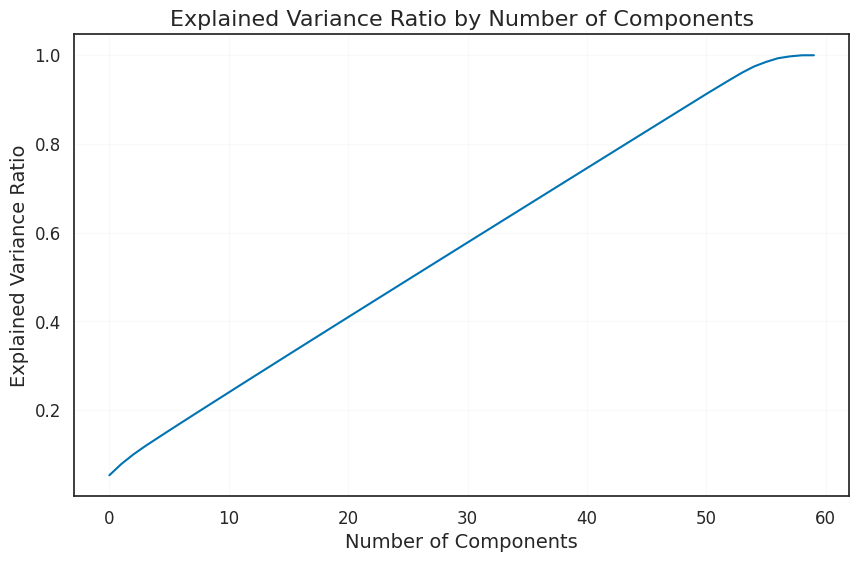

In [91]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

### Cross-Validation on Logistic

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
# Create logistic regression model
log_reg_pca = LogisticRegression(max_iter=1000)

# Apply 5-fold cross-validation (accuracy as metric) on PCA components
cv_scores_pca = cross_val_score(log_reg_pca, X_train_pca, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores (PCA):", cv_scores_pca)
print("Mean Accuracy (PCA):", np.mean(cv_scores_pca))
print("Standard Deviation (PCA):", np.std(cv_scores_pca))

# Train the logistic regression model on the PCA transformed training data
log_reg_pca.fit(X_train_pca, y_train)

# Make predictions on the PCA transformed test data
y_pred_lr_pca = log_reg_pca.predict(X_test_pca)

# Evaluate the model
print("\nLogistic Regression with PCA:")
print(classification_report(y_test, y_pred_lr_pca))
print("Confusion matrix (PCA):")
print(confusion_matrix(y_test, y_pred_lr_pca))

Cross-Validation Scores (PCA): [0.76427163 0.76066498 0.76782192 0.76566727 0.76104599]
Mean Accuracy (PCA): 0.7638943557425212
Standard Deviation (PCA): 0.0027295940925627597

Logistic Regression with PCA:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78     13484
           1       0.65      0.87      0.75      8697

    accuracy                           0.77     22181
   macro avg       0.77      0.79      0.77     22181
weighted avg       0.80      0.77      0.77     22181

Confusion matrix (PCA):
[[9418 4066]
 [1108 7589]]


## 2. Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80     13484
           1       0.67      0.77      0.72      8697

    accuracy                           0.76     22181
   macro avg       0.76      0.77      0.76     22181
weighted avg       0.77      0.76      0.77     22181

[[10212  3272]
 [ 1963  6734]]


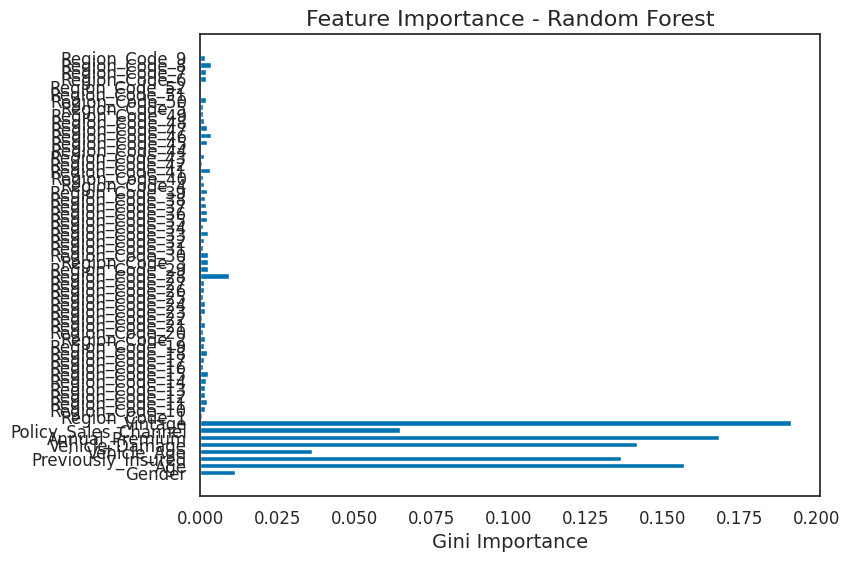

In [96]:
importance_rf = rf.feature_importances_

plt.figure(figsize=(8,6))
plt.barh(feature_names, importance_rf)
plt.xlabel("Gini Importance")
plt.title("Feature Importance - Random Forest")
plt.show()


In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:
# # Base model
# rf_model = RandomForestClassifier(random_state=42)

# # Hyperparameter grid (wider range)
# param_dist = {
#     'n_estimators': np.arange(100, 501, 50),         # Number of trees
#     'max_depth': [None, 10, 20, 30, 40, 50],         # Max depth
#     'min_samples_split': [2, 5, 10],                 # Min samples to split
#     'min_samples_leaf': [1, 2, 4],                   # Min samples per leaf
#     'max_features': ['sqrt', 'log2'],                # Features at split
#     'class_weight': ['balanced', None]               # Imbalance handling
# }

# # Randomized search with 5-fold CV
# random_search_rf = RandomizedSearchCV(
#     rf_model,
#     param_distributions=param_dist,
#     n_iter=30,                # Number of random combinations to try
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=2,
#     random_state=42
# )

# # Fit search
# random_search_rf.fit(X, y)

# # Results
# print("Best Parameters:", random_search_rf.best_params_)
# print("Best CV Score:", random_search_rf.best_score_)

# # Best model
# best_rf = random_search_rf.best_estimator_


In [100]:
# # Base model
# rf_model = RandomForestClassifier(random_state=42)

# # Hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],           # Number of trees
#     'max_depth': [None, 10, 20, 30],           # Tree depth
#     'min_samples_split': [2, 5, 10],           # Min samples to split
#     'min_samples_leaf': [1, 2, 4],             # Min samples per leaf
#     'max_features': ['sqrt', 'log2'],          # Features considered at each split
#     'class_weight': ['balanced', None]         # Handle imbalance
# }

# # Grid search with 5-fold CV
# grid_search_rf = GridSearchCV(
#     rf_model,
#     param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=2
# )

# # Fit grid search
# grid_search_rf.fit(X, y)

# # Results
# print("Best Parameters:", grid_search_rf.best_params_)
# print("Best CV Score:", grid_search_rf.best_score_)

# # Best model
# best_rf = grid_search_rf.best_estimator_


## 3. XGBoost

In [101]:
from xgboost import XGBClassifier

In [102]:
scale_pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])

xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79     13484
           1       0.65      0.91      0.76      8697

    accuracy                           0.78     22181
   macro avg       0.79      0.80      0.78     22181
weighted avg       0.82      0.78      0.78     22181

[[9298 4186]
 [ 777 7920]]


In [103]:
from xgboost import plot_importance

<Figure size 800x600 with 0 Axes>

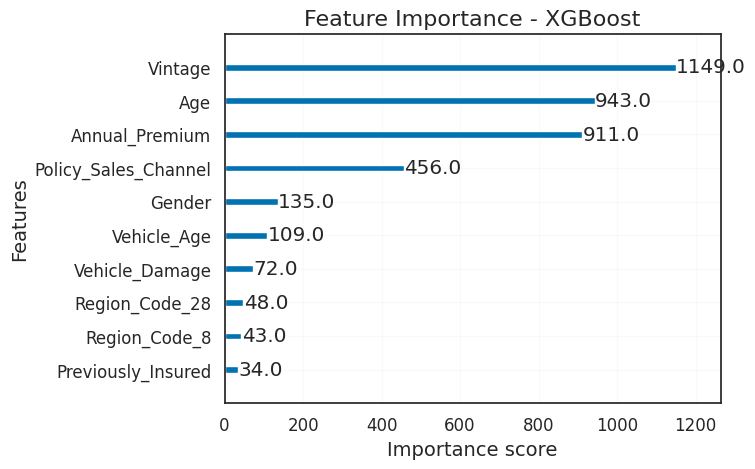

In [104]:
plt.figure(figsize=(8,6))
plot_importance(xgb, importance_type='weight', max_num_features=10)
plt.title("Feature Importance - XGBoost")
plt.show()


## 4. LightGBM

In [105]:
from lightgbm import LGBMClassifier

In [106]:
scale_pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])

lgbm = LGBMClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

print("LightGBM:")
print(classification_report(y_test, y_pred_lgbm))
print(confusion_matrix(y_test, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 34891, number of negative: 53832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 88723, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393258 -> initscore=-0.433639
[LightGBM] [Info] Start training from score -0.433639
LightGBM:
              precision    recall  f1-score   support

           0       0.93      0.68      0.79     13484
           1       0.65      0.93      0.76      8697

    accuracy                           0.78     22181
   macro avg       0.79      0.80      0.78     22181
weighted avg       0.82      0.78      0.78     22181

[[9151 4333]
 [ 643 8054]]


In [107]:
import lightgbm as lgb

<Figure size 800x600 with 0 Axes>

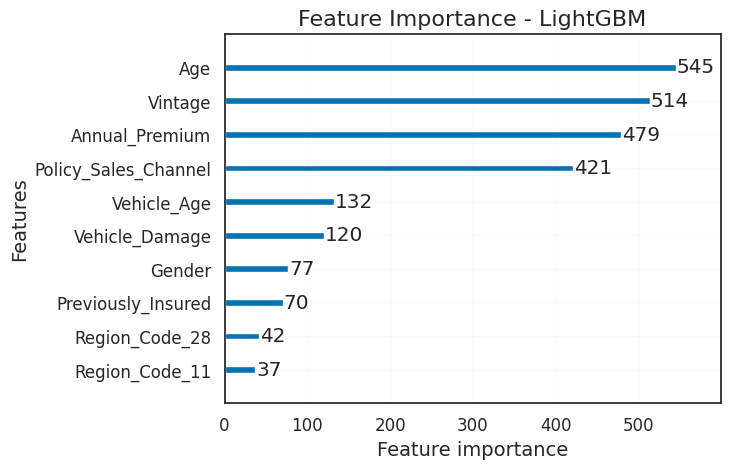

In [108]:
plt.figure(figsize=(8,6))
lgb.plot_importance(lgbm, max_num_features=10, importance_type='split')
plt.title("Feature Importance - LightGBM")
plt.show()


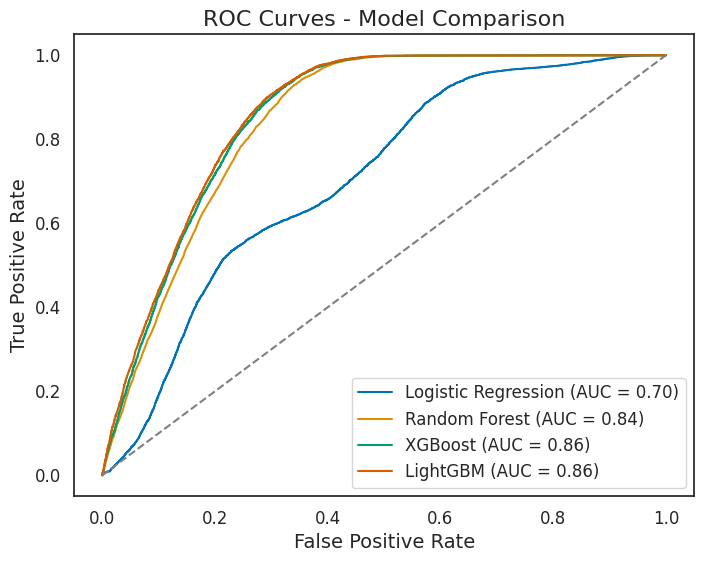

In [109]:
plt.figure(figsize=(8,6))

models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "XGBoost": xgb,
    "LightGBM": lgbm
}

for name, model in models.items():
    # Predicted probabilities for class 1
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot each model's ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend(loc="lower right")
plt.show()
